# ANN DA - Lab 1

In [3]:
# Imports
import numpy as np
np.random.seed(2018)
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


## 2.2 Implementation of the Delta rule

Setting up the variables

In [2]:
# Adding biais
def with_biais(mat):
    biais = np.ones(shape = (1,mat.shape[1]))
    mat_biais = np.concatenate((mat,biais), axis = 0)
    return(mat_biais)

# Initilaizing the weights
def initialize_weights(n_row, n_col):
    return(np.random.normal(size = (n_row,n_col)))

Defining Delta rule

In [3]:
def delta_rule(patterns, targets, weights, learning_rate):
    delta_weights = - learning_rate * ((weights @ patterns) - targets) @ patterns.T
    return(delta_weights)

def delta_rule_epochs(epochs, patterns, targets, weights, learning_rate = 0.001):
    new_weights = np.array(weights)
    for i in range(epochs):
        delta_weights = delta_rule(patterns, targets, new_weights, learning_rate)
        new_weights += delta_weights
    return(new_weights)

Test with some examples:

In [4]:
# Initializing patterns and targets (example of 'sign of x' problem)
patterns = np.array([[-1,1,-1,1],[-1,-1,1,1]])
patterns_biais = with_biais(patterns)
targets = np.array([-1,1,-1,1])
weights = initialize_weights(1,3)


print('We want to get targets: ', targets)
print('\nInitial random weights: ', weights)
print('Results with intial random weights: ', weights @ patterns_biais)

print('\n... Calculation of new weights for epochs = 20 and learning_rate = 0.001 ...')
new_weights_0001 = delta_rule_epochs(20, patterns_biais, targets, weights, learning_rate = 0.001)
print('New weights: ', new_weights_0001)
print('Result with new weights: ', new_weights_0001 @ patterns_biais)

print('\n... Calculation of new weights for epochs = 20 and learning_rate = 0.01 ...')
new_weights_001 = delta_rule_epochs(20, patterns_biais, targets, weights, learning_rate = 0.01)
print('New weights: ', new_weights_001)
print('Result with new weights: ', new_weights_001 @ patterns_biais)

We want to get targets:  [-1  1 -1  1]

Initial random weights:  [[-0.66611252  0.04801876 -2.23223693]]
Results with intial random weights:  [[-1.61414318 -2.94636821 -1.51810565 -2.85033068]]

... Calculation of new weights for epochs = 20 and learning_rate = 0.001 ...
New weights:  [[-0.53776898  0.0443198  -2.06028385]]
Result with new weights:  [[-1.56683466 -2.64237262 -1.47819507 -2.55373303]]

... Calculation of new weights for epochs = 20 and learning_rate = 0.01 ...
New weights:  [[ 0.26357421  0.02122441 -0.98665416]]
Result with new weights:  [[-1.27145278 -0.74430436 -1.22900396 -0.70185553]]


## 2.3 Implementation of a two-layer perceptron

In [5]:
def phi(x):
    return((np.divide(2,(1+np.exp(-x)))-1))

### 2.3.1 The forward  pass

### 2.3.2 The backward pass

### 2.3.3 Weights update

All together:

In [68]:
def fwd_bwd_wup(patterns, targets, weights, weights_hidden, eta, n_hidden, epochs, alpha):
    w = np.array(weights)
    v = np.array(weights_hidden)
    dw, dv = 0, 0
    patterns_biais = with_biais(patterns)
    for i in range(epochs):
        # forward pass
        h_in = w @ patterns_biais
        h_out = with_biais(phi(h_in))
        o_in = v @ h_out
        o_out = phi(o_in)

        # backward pass
        delta_o = (o_out-targets) * (1+o_out) * (1-o_out) * 0.5
        delta_h = (v.T @ delta_o) * ((1 + h_out) * (1 - h_out)) * 0.5
        delta_h = delta_h[range(n_hidden),:]

        # weights update
        dw = (dw * alpha) - (delta_h @ patterns_biais.T) * (1-alpha)
        dv = (dv * alpha) - (delta_o @ h_out.T) * (1-alpha)
        w += dw * eta
        v += dv * eta
        
    return(w,v)

Test with XOR example, n_hidden = 

In [7]:
patterns = np.array([[-1,1,-1,1],[-1,-1,1,1]])
targets = np.array([-1,1,1,-1])
n_hidden = 5

w = initialize_weights(n_row = n_hidden, n_col = 3)
v = initialize_weights(n_row = 1, n_col = n_hidden + 1)

def fast_forward(patterns, w, v):
    h_in = w @ with_biais(patterns)
    h_out = with_biais(phi(h_in))
    o_in = v @ h_out
    o_out = phi(o_in)
    return(o_out)

print('First output: \n')
print(fast_forward(patterns, w, v))

First output: 

[[0.23224097 0.77026342 0.68749797 0.93477806]]


In [8]:
new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
            eta = 0.01, n_hidden = n_hidden, epochs = 1000, alpha = 0.9)

In [9]:
print('After computation output: \n')
print(fast_forward(patterns, new_w, new_v))

After computation output: 

[[-0.77264064  0.8085086   0.78650048  0.98173887]]


### 2.4 Monitoring the Learning Process

## 3. Assignment - Part 1

### 3.1 Classification with a single-layer perceptron

#### 3.1.1 Generation of linearly-separable data

In [10]:
def generate_points(n, m_A, m_B, sigma_A, sigma_B):
    class_A = np.array([np.random.randn(n)*sigma_A + m_A[0], np.random.randn(n)*sigma_A + m_A[1]]).T
    class_B = np.array([np.random.randn(n)*sigma_B + m_B[0], np.random.randn(n)*sigma_B + m_B[1]]).T

    # Shuffling
    dataset_ini = np.concatenate([class_A, class_B])
    classes_ini = np.array([1]*n+[-1]*n)
    seq = [i for i in range(len(dataset_ini))]
    np.random.shuffle(seq)
    dataset = dataset_ini[seq]
    classes = classes_ini[seq]
    return(dataset, classes)

dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [-2., -2.], sigma_A = 0.5, sigma_B = 0.5)

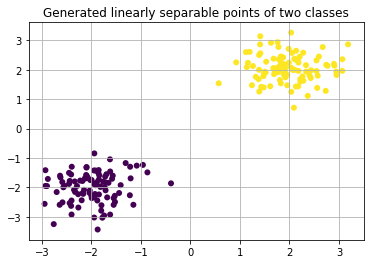

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

#### 3.1.2 Classifcation with a single-layer perceptron and analysis

In [12]:
def learning_perceptron(patterns, targets, weights, eta):
        delta_weights = - eta * (np.sign(weights @ patterns) - targets) @ patterns.T / 2
        return(delta_weights)
    
def learning_perceptron_epochs(epochs, patterns, targets, weights, eta):
    new_weights = np.array(weights)
    error_class = []
    weights_list = np.array(weights)
    for i in range(epochs):
        error_class.append(int(np.sum(abs(np.sign(new_weights @ patterns) - targets))/2))
        delta_weights = learning_perceptron(patterns, targets, new_weights, eta)
        new_weights += delta_weights
        weights_list = np.concatenate([weights_list,new_weights])
    return(new_weights, error_class, weights_list)

def delta_rule_2(patterns, targets, weights, eta):
    delta_weights = - eta * ((weights @ patterns) - targets) @ patterns.T
    return(delta_weights)

def delta_rule_epochs_2(epochs, patterns, targets, weights, eta):
    new_weights = np.array(weights)
    error_class = []
    weights_list = np.array(weights)
    for i in range(epochs):
        error_class.append(int(np.sum(abs(np.sign(new_weights @ patterns) - targets))/2))
        delta_weights = delta_rule_2(patterns, targets, new_weights, eta)
        new_weights += delta_weights
        weights_list = np.concatenate([weights_list,new_weights])
    return(new_weights, error_class, weights_list)

In [13]:
weights = initialize_weights(n_row = 1, n_col = 3)
eta = 0.001
dataset_biais = with_biais(np.transpose(dataset))

new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)

##### Plotting the animations

In [14]:
def from_Weights_List_To_Points(weights_list, x_lim_min, x_lim_max):
    y_min =  np.array(-weights_list[:,2]/weights_list[:,1] - x_lim_min*weights_list[:,0]/weights_list[:,1])
    y_max =  np.array(-weights_list[:,2]/weights_list[:,0] - x_lim_max*weights_list[:,0]/weights_list[:,1])
    x_min = np.array(x_lim_min*np.ones(len(y_min)))
    x_max = np.array(x_lim_max*np.ones(len(y_max)))
    return(x_min,x_max,y_min,y_max)

x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_lp, -5, 5)
x_min_dr, x_max_dr, y_min_dr, y_max_dr = from_Weights_List_To_Points(weights_list_dr, -5, 5)

In [15]:
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = 'C:/FFmpeg/bin/ffmpeg'

def animation_lines(x_min, x_max, y_min, y_max):
    fig, ax = plt.subplots()
    min_y = min(np.min(y_min), np.min(y_max))
    max_y = max(np.max(y_min), np.max(y_max))
    
    def animate(i):
        ax.clear()
        ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
        ax.set_xlim(left=x_min[0], right = x_max[0])
        ax.set_ylim(bottom=min_y, top = max_y)
        line = ax.plot([x_min[i], x_max[i]], [y_min[i], y_max[i]])  # update the data
        return line

    ani = animation.FuncAnimation(fig, animate, len(y_min), interval=1000, blit=True)
    return(HTML(ani.to_html5_video()))

For learning perceptron

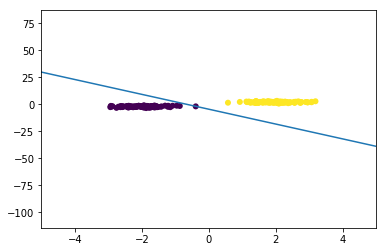

In [16]:
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

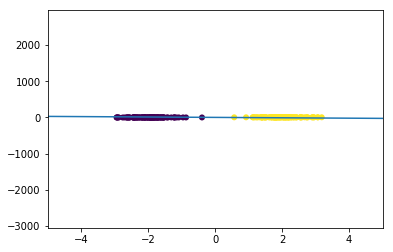

In [17]:
animation_lines(x_min_dr, x_max_dr, y_min_dr, y_max_dr)

##### Looking for the effect of eta

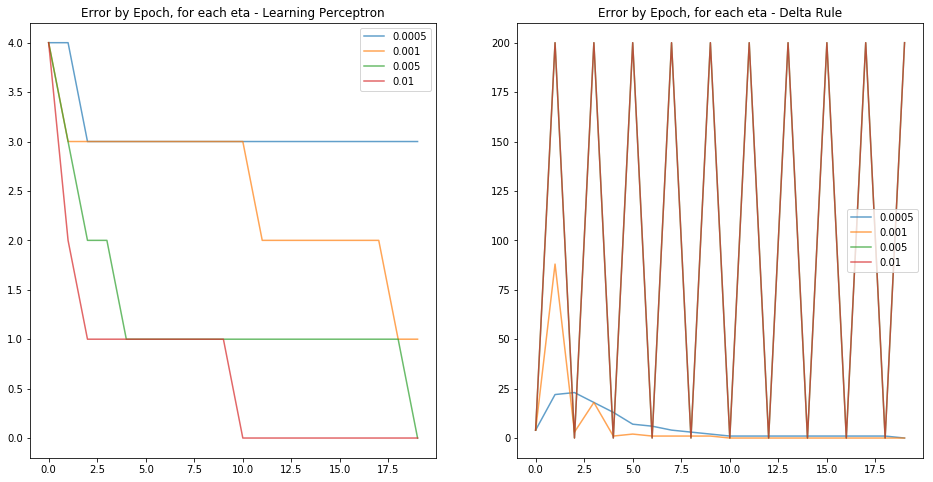

In [18]:
etas = [0.0005, 0.001 ,0.005, 0.01]

error_lp_list = []
error_dr_list = []

fig, axs = plt.subplots(1,2, figsize=(16, 8))

for eta in etas:
    new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    axs[0].plot([i for i in range(len(error_lp))], error_lp, label = eta, alpha = 0.7)
    axs[1].plot([i for i in range(len(error_dr))], error_dr, label = eta, alpha = 0.7)

axs[0].legend()
axs[0].set_title('Error by Epoch, for each eta - Learning Perceptron')
axs[1].legend()
axs[1].set_title('Error by Epoch, for each eta - Delta Rule')
plt.show()

##### Introducing the delta rule 1 by 1

In [19]:
def delta_rule_1by1(pattern, target, weights, eta):
    delta_weights = - eta * (sum([pattern[i]*weights[0,i] for i in range(len(pattern))] - target)) * pattern.T
    return(delta_weights)

def delta_rule_epochs_1by1(epochs, patterns, targets, weights, eta):
    new_weights = np.array(weights)
    error_class = []
    weights_list = np.array(weights)
    for i in range(epochs):
        for j in range(len(patterns[0,:])):
            delta_weights = delta_rule_1by1(patterns[:,j], targets[j], new_weights, eta)
            new_weights += delta_weights
        error_class.append(int(np.sum(abs(np.sign(new_weights @ patterns) - targets))))
        weights_list = np.concatenate([weights_list,new_weights])
    return(new_weights, error_class, weights_list)

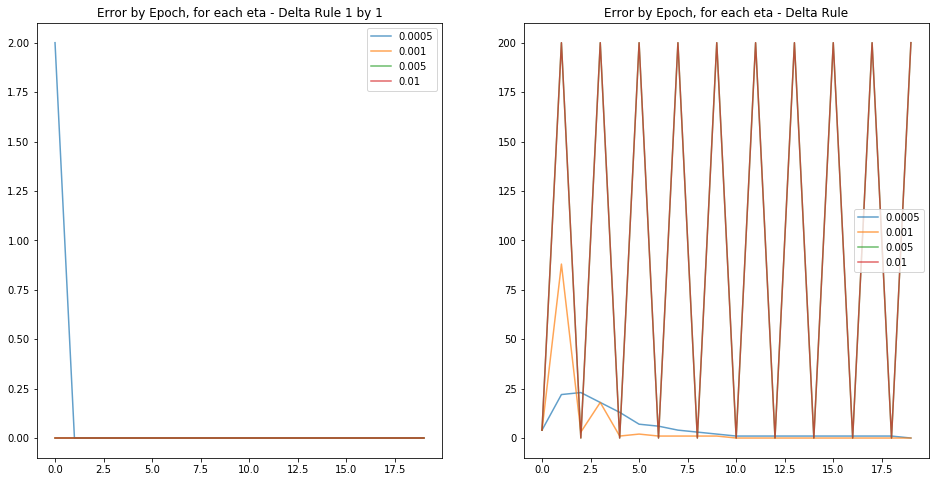

In [20]:
etas = [0.0005, 0.001 ,0.005, 0.01]
fig, axs = plt.subplots(1,2, figsize=(16, 8))

for eta in etas:
    new_weights_dr_1by1, error_1by1, weights_list_1by1 = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    axs[0].plot([i for i in range(len(error_1by1))], error_1by1, label = eta, alpha = 0.7)
    axs[1].plot([i for i in range(len(error_dr))], error_dr, label = eta, alpha = 0.7)

axs[0].legend()
axs[0].set_title('Error by Epoch, for each eta - Delta Rule 1 by 1')
axs[1].legend()
axs[1].set_title('Error by Epoch, for each eta - Delta Rule')
plt.show()

Sensitivity of sample to randomisation of input:

In [21]:
error_1by1_list = []

def first_to_0(x):
    for i in x:
        if i == 0:
            result = i
            break
    return(result)

for i in range(10):
    seq = [i for i in range(len(dataset_biais[0,:]))]
    np.random.shuffle(seq)
    dataset_biais2 = dataset_biais[:,seq]
    targets2 = classes[seq]
    
    new_weights_lp, error_lp, weights_list_lp = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais2,
                                                      targets=targets2,weights= weights,eta=eta)
    
    error_1by1_list.append(first_to_0(error_lp))
    
print(error_1by1_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


##### Removing the biais

In [22]:
dataset, classes = generate_points(n = 100, m_A = [4., 4], m_B = [0, 0], sigma_A = 0.5, sigma_B = 0.5)
weights = initialize_weights(n_row = 1, n_col = 2)

new_weights_lp, error_lp, weights_list_lp = delta_rule_epochs_2(epochs = 20, patterns= dataset.T,
                                                      targets=targets2,weights= weights,eta=0.001)

In [23]:
error_lp

[98,
 106,
 95,
 104,
 96,
 104,
 96,
 104,
 96,
 104,
 96,
 104,
 96,
 104,
 96,
 104,
 96,
 104,
 96,
 104]

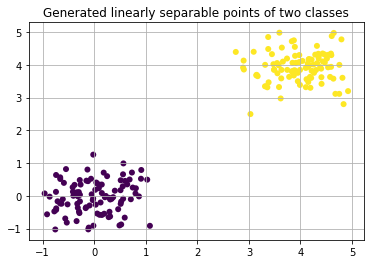

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

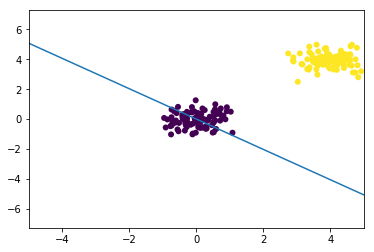

In [25]:
weights_list_biais_0 = np.concatenate([weights_list_lp.T,[np.zeros(len(weights_list_lp[:,0]))]]).T
x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_biais_0, -5, 5)
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

The problem is that in this case it has to pass by (0,0)

#### 3.1.3 Classifcation of samples that are not linearly separable

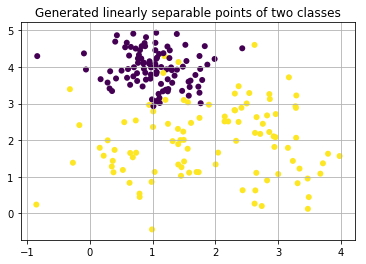

In [26]:
dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [1, 4], sigma_A = 1, sigma_B = 0.5)
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

In [27]:
weights = initialize_weights(n_row = 1, n_col = 3)
eta = 0.001
dataset_biais = with_biais(np.transpose(dataset))

new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
new_weights_dr_1by1, error_dr_1by1, weights_list_dr_1by1 = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)

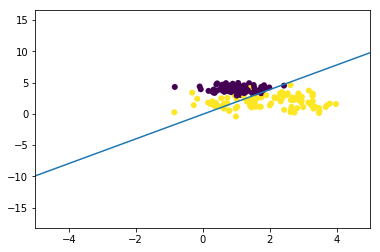

In [28]:
x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_dr_1by1, -5, 5)
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

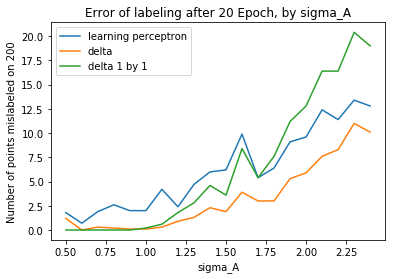

In [29]:
best_avg_lp, best_avg_dr, best_avg_dr_1by1 = [], [], []

for i in range(20):
    best_lp, best_dr, best_dr_1by1 = [], [], []
    for j in range(10):
        dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [-2, -2], sigma_A = 0.5+i/10, sigma_B = 0.5)
        weights = initialize_weights(n_row = 1, n_col = 3)
        eta = 0.001
        dataset_biais = with_biais(np.transpose(dataset))

        new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
        new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
        new_weights_dr_1by1, error_dr_1by1, weights_list_dr_1by1 = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
        best_lp.append(np.min(error_lp))
        best_dr.append(np.min(error_dr))
        best_dr_1by1.append(np.min(error_dr_1by1))
        
    best_avg_lp.append(np.mean(best_lp))
    best_avg_dr.append(np.mean(best_dr))
    best_avg_dr_1by1.append(np.mean(best_dr_1by1))

sigma_A_values = [0.5+i/10 for i in range(20)]
fig, ax = plt.subplots()
plt.plot(sigma_A_values, best_avg_lp, label = 'learning perceptron')
plt.plot(sigma_A_values, best_avg_dr, label = 'delta')
plt.plot(sigma_A_values, best_avg_dr_1by1, label = 'delta 1 by 1')
ax.legend()
ax.set_title('Error of labeling after 20 Epoch, by sigma_A')
ax.set_xlabel('sigma_A')
ax.set_ylabel('Number of points mislabeled on 200')
plt.show()


##### Second part with input given

In [30]:
n= 100
m_A, sigma_A = [1, 0.3], 0.2
m_B, sigma_B = [0, -0.1], 0.3
class_A = np.array([np.concatenate([np.random.randn(1,n//2)*sigma_A - m_A[0],np.random.randn(1,n//2)*sigma_A + m_A[0]], axis = 1)[0,:],
                    np.random.randn(n)*sigma_A + m_A[1]]).T
class_B = np.array([np.random.randn(n)*sigma_B + m_B[0], np.random.randn(n)*sigma_B + m_B[1]]).T

    # Shuffling
dataset_ini = np.concatenate([class_A, class_B])
classes_ini = np.array([1]*n+[-1]*n)
seq = [i for i in range(len(dataset_ini))]
np.random.shuffle(seq)
dataset = dataset_ini[seq]
classes = classes_ini[seq]

Last number of errors:  35


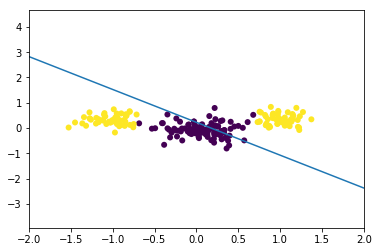

In [31]:
weights = initialize_weights(n_row = 1, n_col = 3)
eta = 0.001
dataset_biais = with_biais(np.transpose(dataset))

new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
print('Last number of errors: ',error_dr[-1])
x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_dr_1by1, -2, 2)
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

##### Several scenarios for sampling

Random 25% from each class

In [32]:
def performance_on_sampling(dataset, classes, iterations, seq, nn_fun):

    weights = initialize_weights(n_row = 1, n_col = 3)
    eta = 0.001

    error_avg_dr_1by1 = []

    for k in range(iterations):
        dataset_sampled = dataset[seq,:]
        dataset_biais_sampled = with_biais(np.transpose(dataset_sampled))
        classes_sampled = classes[seq]


        new_weights_dr_1by1, error_dr_1by1, weights_list_dr_1by1 = nn_fun(epochs = 20, patterns= dataset_biais_sampled,
                                                                  targets=classes_sampled,weights= weights,eta=eta)
        error_avg_dr_1by1.append(error_dr_1by1[-1])

    print('Median number of errors: ',np.median(error_avg_dr_1by1))

In [33]:
seq = np.random.choice([i for i in range(200)], 150, replace = False)
    
performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  72.0


Random 50% from class A

In [34]:
seq = np.concatenate([np.random.choice(np.where(classes==1)[0], 50, replace = False), np.where(classes!=1)[0]])

performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  98.0


Random 50% from class B

In [35]:
seq = np.concatenate([np.random.choice(np.where(classes==-1)[0], 50, replace = False), np.where(classes==1)[0]])

performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  72.0


20% of class_A < 0 and 80% of class_A > 0

In [36]:
cond_1 = np.where(dataset[:,0] > 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq1 = np.random.choice(cond, 40, replace = False)
    
cond_1 = np.where(dataset[:,0] <= 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq2 = np.random.choice(cond, 10, replace = False)
    
seq = np.concatenate([seq1, seq2, np.where(classes!=1)[0]])

performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  56.0


### 3.2 Classication and regression with a two-layer perceptron

#### 3.2.1 Classification of linearly non-separable data

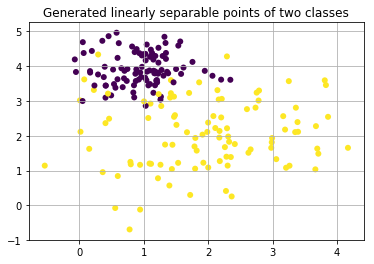

In [37]:
dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [1, 4], sigma_A = 1, sigma_B = 0.5)
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

In [38]:
def fwd_bwd_wup(patterns, targets, weights, weights_hidden, eta, n_hidden, epochs, alpha):
    w = np.array(weights)
    v = np.array(weights_hidden)
    dw, dv = 0, 0
    patterns_biais = with_biais(patterns)
    for i in range(epochs):
        # forward pass
        h_in = w @ patterns_biais
        h_out = with_biais(phi(h_in))
        o_in = v @ h_out
        o_out = phi(o_in)

        # backward pass
        delta_o = (o_out-targets) * (1+o_out) * (1-o_out) * 0.5
        delta_h = (v.T @ delta_o) * ((1 + h_out) * (1 - h_out)) * 0.5
        delta_h = delta_h[range(n_hidden),:]

        # weights update
        dw = (dw * alpha) - (delta_h @ patterns_biais.T) * (1-alpha)
        dv = (dv * alpha) - (delta_o @ h_out.T) * (1-alpha)
        w += dw * eta
        v += dv * eta
        
    return(w,v)

def fast_forward(patterns, w, v):
    h_in = w @ with_biais(patterns)
    h_out = with_biais(phi(h_in))
    o_in = v @ h_out
    o_out = phi(o_in)
    return(o_out)

def check_errors(patterns, classes, new_w, new_v):
    ans = fast_forward(patterns, new_w, new_v)
    error_label = int(np.sum(abs(np.sign(ans)-classes)/2))
    error_mean_square = np.sum((ans-classes)**2)
    return(error_label, error_mean_square)

def test_multi_layer(epochs_list, dataset, classes, n_hidden_list, test_dataset, test_classes):
    error_epoch_label_list, error_epoch_mean_square_list = [], []
    for epoch in epochs_list:
        error_avg_label_list, error_avg_mean_square_list = [], []
        for i in n_hidden_list:
            error_label_list, error_mean_square_list = [], []
            for j in range(10):
                n_hidden = i
                w = initialize_weights(n_row = n_hidden, n_col = 3)
                v = initialize_weights(n_row = 1, n_col = n_hidden + 1)

                new_w, new_v = fwd_bwd_wup(patterns = dataset.T, targets = classes, weights = w, weights_hidden = v,
                            eta = 0.001, n_hidden = n_hidden, epochs = epoch, alpha = 0.9)


                error_label, error_mean_square = check_errors(test_dataset.T, test_classes, new_w, new_v)
                error_label_list.append(error_label)
                error_mean_square_list.append(error_mean_square)

            error_avg_label_list.append(np.median(error_label_list))
            error_avg_mean_square_list.append(np.median(error_mean_square_list))

        error_epoch_label_list.append(error_avg_label_list)
        error_epoch_mean_square_list.append(error_avg_mean_square_list)
        
    return(error_epoch_label_list, error_epoch_mean_square_list)

In [39]:
epochs_list = [20, 100]
n_hidden_list = [i for i in range(1,11)]

error_epoch_label_list, error_epoch_mean_square_list = test_multi_layer(classes=classes, dataset=dataset,test_classes= classes, 
                                                                        test_dataset = dataset, epochs_list=epochs_list,
                                                                        n_hidden_list= n_hidden_list)

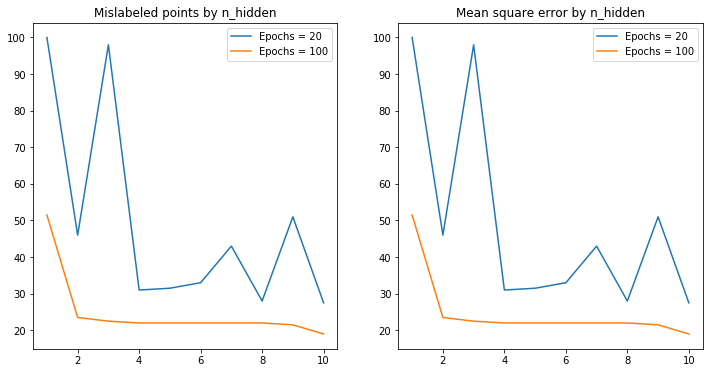

In [40]:
fig, axs = plt.subplots(1,2,figsize=(12, 6))
axs[0].plot(n_hidden_list, error_epoch_label_list[0], label='Epochs = 20')
axs[0].plot(n_hidden_list, error_epoch_label_list[1], label='Epochs = 100')
axs[0].set_title('Mislabeled points by n_hidden')
axs[0].legend()
axs[1].plot(n_hidden_list, error_epoch_label_list[0], label='Epochs = 20')
axs[1].plot(n_hidden_list, error_epoch_label_list[1], label='Epochs = 100')
axs[1].set_title('Mean square error by n_hidden')
axs[1].legend()
plt.show()

##### 2 Using the sampling again

In [41]:
n= 100
m_A, sigma_A = [1, 0.3], 0.2
m_B, sigma_B = [0, -0.1], 0.3
class_A = np.array([np.concatenate([np.random.randn(1,n//2)*sigma_A - m_A[0],np.random.randn(1,n//2)*sigma_A + m_A[0]], axis = 1)[0,:],
                    np.random.randn(n)*sigma_A + m_A[1]]).T
class_B = np.array([np.random.randn(n)*sigma_B + m_B[0], np.random.randn(n)*sigma_B + m_B[1]]).T

    # Shuffling
dataset_ini = np.concatenate([class_A, class_B])
classes_ini = np.array([1]*n+[-1]*n)
seq = [i for i in range(len(dataset_ini))]
np.random.shuffle(seq)
dataset = dataset_ini[seq]
classes = classes_ini[seq]

In [42]:
seq1 = np.random.choice([i for i in range(200)], 150, replace = False)
seq2 = np.concatenate([np.random.choice(np.where(classes==1)[0], 50, replace = False), np.where(classes!=1)[0]])
seq3 = np.concatenate([np.random.choice(np.where(classes==-1)[0], 50, replace = False), np.where(classes==1)[0]])
cond_1 = np.where(dataset[:,0] > 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq41 = np.random.choice(cond, 40, replace = False)
    
cond_1 = np.where(dataset[:,0] <= 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq42 = np.random.choice(cond, 10, replace = False)
    
seq4 = np.concatenate([seq41, seq42, np.where(classes!=1)[0]])

epochs_list = [20, 100]
n_hidden_list = [i for i in range(1,11)]

seqs = [seq1, seq2, seq3, seq4]

error_seq_label_list = []
error_seq_mean_square_list = []

for seq in seqs:
    train_dataset = dataset[seq,:]
    test_dataset = dataset[np.setdiff1d(np.array([i for i in range(200)]), seq),:]
    train_classes = classes[seq]
    test_classes = classes[np.setdiff1d(np.array([i for i in range(200)]), seq)]

    error_epoch_label_list, error_epoch_mean_square_list = test_multi_layer(classes= train_classes, dataset= train_dataset,
                                                                            test_classes= test_classes, 
                                                                            test_dataset = test_dataset, epochs_list=epochs_list,
                                                                            n_hidden_list= n_hidden_list)
    error_seq_label_list.append(error_epoch_label_list)
    error_seq_mean_square_list.append(error_epoch_mean_square_list)

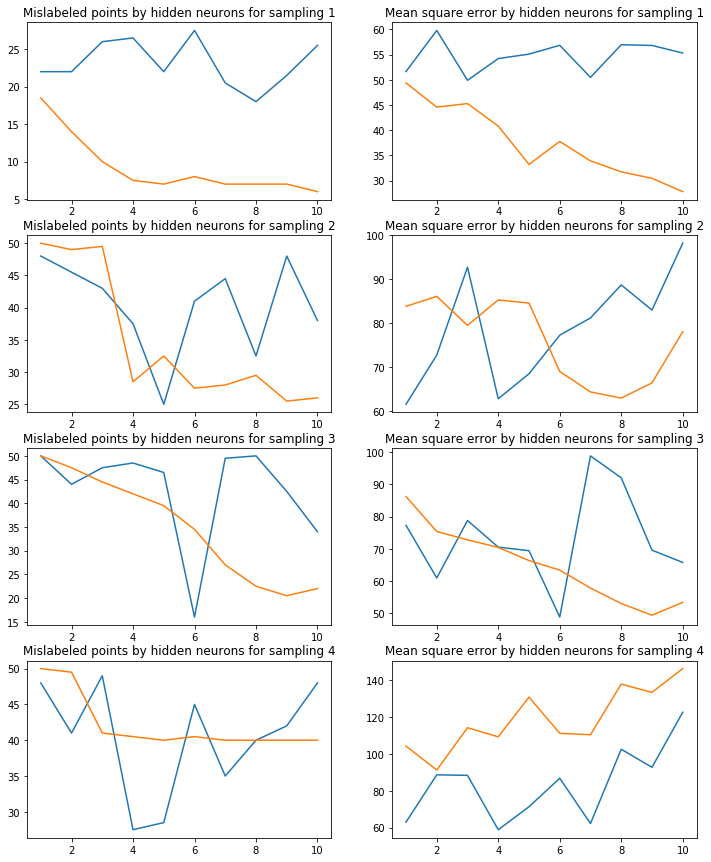

In [43]:
fig, axs = plt.subplots(4,2,figsize=(12, 15))
error_types = ['Mislabeled points', 'Mean square error']
errors = [error_seq_label_list, error_seq_mean_square_list]
for seq_i in range(4):
    for error_type in range(2):
        axs[seq_i, error_type].plot(n_hidden_list, errors[error_type][seq_i][0], label='Epochs = 20')
        axs[seq_i, error_type].plot(n_hidden_list, errors[error_type][seq_i][1], label='Epochs = 20')
        axs[seq_i, error_type].set_title(error_types[error_type]+' by hidden neurons for sampling '+str(seq_i+1))

Getting an idea of what is the classification made by the neural network:

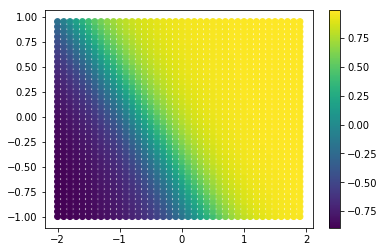

In [44]:
x, y = np.mgrid[slice(-2, 2, 0.1), slice(-1, 1, 0.05)]
x, y = np.concatenate(x), np.concatenate(y)
dataset_graph = np.array([x,y])
result = fast_forward(patterns=dataset_graph, v=new_v, w= new_w)

plt.scatter(dataset_graph[0,:], dataset_graph[1,:], c =result[0,:])
plt.colorbar()
plt.show()

#### 3.2.2 Encoder Problem

In [45]:
def check_errors_encoder(patterns, classes, new_w, new_v):
    ans = fast_forward(patterns, new_w, new_v)
    error = 8 - np.sum(np.sum(np.round(fast_forward(patterns, new_w, new_v))==targets, axis=0)==7)
    return(error)

In [46]:
n_hidden = 3
w = initialize_weights(n_row = n_hidden, n_col = 9)
v = initialize_weights(n_row = 8, n_col = n_hidden + 1)

patterns = np.array([[1,-1,-1,-1,-1,-1,-1,-1],[-1,1,-1,-1,-1,-1,-1,-1],[-1,-1,1,-1,-1,-1,-1,-1],[-1,-1,-1,1,-1,-1,-1,-1],
                    [-1,-1,-1,-1,1,-1,-1,-1],[-1,-1,-1,-1,-1,1,-1,-1],[-1,-1,-1,-1,-1,-1,1,-1],[-1,-1,-1,-1,-1,-1,-1,1]]).T
targets = patterns
new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                           eta = 0.001, n_hidden = n_hidden, epochs = 1000, alpha = 0.9)


To do: How does the internal code look, what does it represent? For that, you
can inspect the activations of the hidden layer corresponding to input
patterns. You could also examine the weight matrix for the rst layer.
Can you deduce anything from the sign of the weights?

In [47]:
np.round(new_w)

array([[-0., -1., -0.,  0., -1.,  2.,  0., -0., -1.],
       [-1., -1.,  0., -1., -0.,  0., -2.,  0.,  1.],
       [ 1.,  1.,  0.,  1.,  1., -1.,  2.,  0., -0.]])

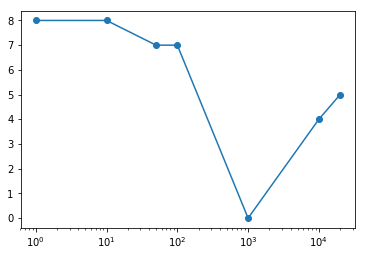

In [48]:
epochs = [1,10,50,100,1000, 10000, 20000]
error_list = []
for epoch in epochs:
    new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                           eta = 0.001, n_hidden = n_hidden, epochs = epoch, alpha = 0.9)
    error = check_errors_encoder(classes=targets, patterns=patterns, new_v=new_v, new_w = new_w)
    error_list.append(error)
plt.plot(epochs, error_list, 'o-')
plt.xscale('log')

We will take epoch = 1000 as a good compromise between accuracy and performance

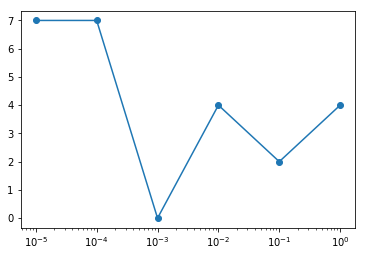

In [49]:
etas = [0.00001,0.0001,0.001,0.01,0.1,1]
error_list = []
for eta in etas:
    new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                           eta = eta, n_hidden = n_hidden, epochs = 1000, alpha = 0.9)
    error = check_errors_encoder(classes=targets, patterns=patterns, new_v=new_v, new_w = new_w)
    error_list.append(error)
plt.plot(etas, error_list, 'o-')
plt.xscale('log')

We will take eta = 0.001 which gives the best result

For n_hidden = 2:

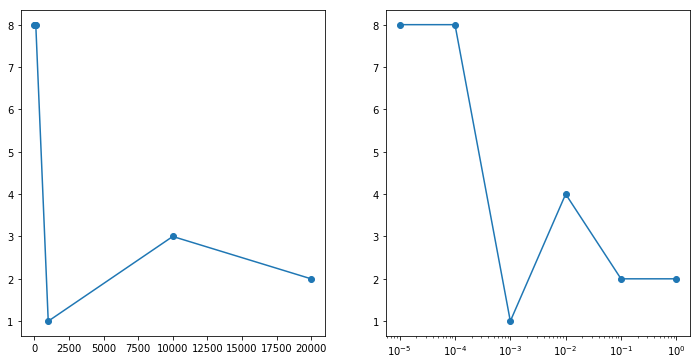

In [50]:
n_hidden = 2
w = initialize_weights(n_row = n_hidden, n_col = 9)
v = initialize_weights(n_row = 8, n_col = n_hidden + 1)

patterns = np.array([[1,-1,-1,-1,-1,-1,-1,-1],[-1,1,-1,-1,-1,-1,-1,-1],[-1,-1,1,-1,-1,-1,-1,-1],[-1,-1,-1,1,-1,-1,-1,-1],
                    [-1,-1,-1,-1,1,-1,-1,-1],[-1,-1,-1,-1,-1,1,-1,-1],[-1,-1,-1,-1,-1,-1,1,-1],[-1,-1,-1,-1,-1,-1,-1,1]]).T
targets = patterns

fig, axs = plt.subplots(1,2, figsize = [12,6])

epochs = [1,10,50,100,1000, 10000, 20000]
error_list = []
for epoch in epochs:
    new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                           eta = 0.001, n_hidden = n_hidden, epochs = epoch, alpha = 0.9)
    error = check_errors_encoder(classes=targets, patterns=patterns, new_v=new_v, new_w = new_w)
    error_list.append(error)
axs[0].plot(epochs, error_list, 'o-')
plt.xscale('log')

etas = [0.00001,0.0001,0.001,0.01,0.1,1]
error_list = []
for eta in etas:
    new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                           eta = eta, n_hidden = n_hidden, epochs = 1000, alpha = 0.9)
    error = check_errors_encoder(classes=targets, patterns=patterns, new_v=new_v, new_w = new_w)
    error_list.append(error)
axs[1].plot(etas, error_list, 'o-')
plt.xscale('log')

plt.show()

Auto encoder role: compression

### 3.3 Function approximation

#### 3.3.1 Generate function data

In [61]:
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    return(np.exp(-(x**2+y**2)/10)-0.5)

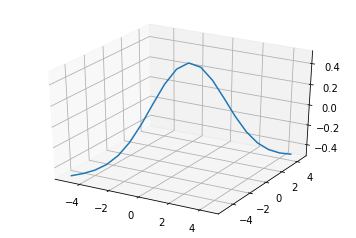

In [62]:
x = np.arange(-5,5,0.5)
y = np.arange(-5,5,0.5)
z = f(x,y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()

patterns = np.array([x,y])
targets = z

#### 3.3.2 Train the network and visualise the approximated function

In [125]:
def check_errors_ms(patterns, classes, new_w, new_v):
    ans = fast_forward(patterns, new_w, new_v)
    error_mean_square = np.mean((ans-classes)**2)
    return(error_mean_square)

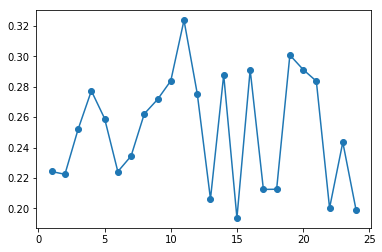

In [126]:
n_hidden_list = np.arange(1,25)
error_avg_list = []

for n_hidden in n_hidden_list:
    error_list = []
    for i in range(100):
        w = initialize_weights(n_row = n_hidden, n_col = 3)
        v = initialize_weights(n_row = 1, n_col = n_hidden + 1)
        new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                               eta = 0.001, n_hidden = n_hidden, epochs = 100, alpha = 0.9)
        error = check_errors_ms(classes=targets, patterns=patterns, new_v=new_v, new_w = new_w)
        error_list.append(error)
        
    error_avg_list.append(np.median(error_list))
plt.plot(n_hidden_list, error_avg_list, 'o-')
plt.show()

We will take n_hidden = 15 which seems the most reasonable compromise between complexity and performance

In [127]:
# We redefine back propagate to have some more logs for the animation
def fwd_bwd_wup_logs(patterns, targets, weights, weights_hidden, eta, n_hidden, epochs, alpha):
    w = np.array(weights)
    v = np.array(weights_hidden)
    dw, dv = 0, 0
    patterns_biais = with_biais(patterns)
    error_list = []
    weights_list = []
    for i in range(epochs):
        # forward pass
        h_in = w @ patterns_biais
        h_out = with_biais(phi(h_in))
        o_in = v @ h_out
        o_out = phi(o_in)

        # backward pass
        delta_o = (o_out-targets) * (1+o_out) * (1-o_out) * 0.5
        delta_h = (v.T @ delta_o) * ((1 + h_out) * (1 - h_out)) * 0.5
        delta_h = delta_h[range(n_hidden),:]

        # weights update
        dw = (dw * alpha) - (delta_h @ patterns_biais.T) * (1-alpha)
        dv = (dv * alpha) - (delta_o @ h_out.T) * (1-alpha)
        w += dw * eta
        v += dv * eta
        
        error_list.append(check_errors_ms(classes=targets, patterns=patterns, new_v= v, new_w = w))
        weights_list.append([np.array(w),np.array(v)])
        
    return(w,v, error_list, weights_list)

In [128]:
n_hidden = 15
w = initialize_weights(n_row = n_hidden, n_col = 3)
v = initialize_weights(n_row = 1, n_col = n_hidden + 1)
new_w, new_v, error_list, weights_list = fwd_bwd_wup_logs(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                               eta = 0.1, n_hidden = n_hidden, epochs = 100, alpha = 0.9)


In [129]:
predictions = [fast_forward(patterns=patterns,w = i[0], v = i[1]) for i in weights_list]

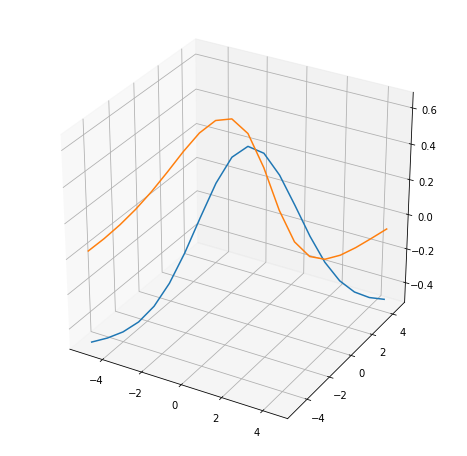

In [130]:
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = 'C:/FFmpeg/bin/ffmpeg'

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')
    
def animate(i):
    ax.clear()
    ax.plot(x, y, targets)
    ax.plot(x, y, predictions[i][0])
    return ax

ani = animation.FuncAnimation(fig, animate, len(predictions), interval=100, blit=False)
HTML(ani.to_html5_video())

#### 3.3.3 Evaluate generalisation performance

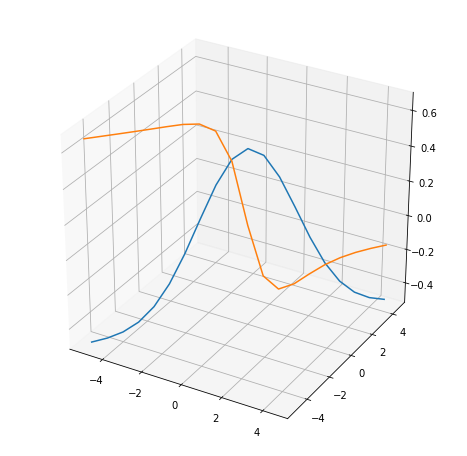

In [108]:
n_hidden_list = [i for i in range(1,26)]

predictions_list = []

for n_hidden in n_hidden_list:

    w = initialize_weights(n_row = n_hidden, n_col = 3)
    v = initialize_weights(n_row = 1, n_col = n_hidden + 1)
    new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
                                   eta = 0.1, n_hidden = n_hidden, epochs = 20, alpha = 0.9)
    predictions_list.append(fast_forward(patterns=patterns,w = new_w, v = new_v))

   
plt.rcParams['animation.ffmpeg_path'] = 'C:/FFmpeg/bin/ffmpeg'

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')

def animate(i):
    ax.clear()
    ax.plot(x, y, targets)
    ax.plot(x, y, predictions[i][0])
    return ax

ani = animation.FuncAnimation(fig, animate, len(predictions_list), interval=500, blit=False)
HTML(ani.to_html5_video())

##### 2. Best model n_hidden = 8 with sampling:

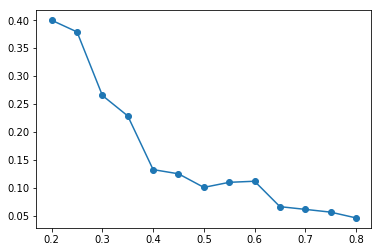

Score for 80% - 20%:  0.045935270960177896


In [139]:
training_size_list = [int(i*len(x)/100) for i in range(20,85,5)]
n_hidden = 15
error_avg_list = []

for training_size in training_size_list:
    error_list = []
    for i in range(100):
        seq = [i for i in range(len(x))]
        seq_train = np.random.choice(seq, training_size, replace=False)
        seq_valid = np.setdiff1d(ar1=seq, ar2=seq_train)
        x_train, x_valid = x[seq_train], x[seq_valid]
        y_train, y_valid = y[seq_train], y[seq_valid]
        z_train, z_valid = z[seq_train], z[seq_valid]

        w = initialize_weights(n_row = n_hidden, n_col = 3)
        v = initialize_weights(n_row = 1, n_col = n_hidden + 1)
        new_w, new_v = fwd_bwd_wup(patterns = np.array([x_train,y_train]), targets = z_train, weights = w, weights_hidden = v,
                                       eta = 0.1, n_hidden = n_hidden, epochs = 20, alpha = 0.9)
        error = check_errors_ms(classes=z_valid, new_v=new_v,new_w=new_w, patterns=np.array([x_valid,y_valid]))
        error_list.append(error)
    error_avg_list.append(np.median(error_list))
    
fig, ax = plt.subplots()
ax.plot(np.divide(training_size_list,len(x)), error_avg_list, 'o-')
plt.show()
print('Score for 80% - 20%: ',str(error_avg_list[-1]))

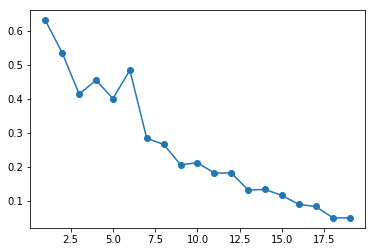

In [141]:
epochs = [i for i in range(1,20)]
training_size = int(0.8*len(x))
n_hidden = 15
error_avg_list = []

for epoch in epochs:
    error_list = []
    for i in range(100):
        seq = [i for i in range(len(x))]
        seq_train = np.random.choice(seq, training_size, replace=False)
        seq_valid = np.setdiff1d(ar1=seq, ar2=seq_train)
        x_train, x_valid = x[seq_train], x[seq_valid]
        y_train, y_valid = y[seq_train], y[seq_valid]
        z_train, z_valid = z[seq_train], z[seq_valid]

        w = initialize_weights(n_row = n_hidden, n_col = 3)
        v = initialize_weights(n_row = 1, n_col = n_hidden + 1)
        new_w, new_v = fwd_bwd_wup(patterns = np.array([x_train,y_train]), targets = z_train, weights = w, weights_hidden = v,
                                       eta = 0.1, n_hidden = n_hidden, epochs = epoch, alpha = 0.9)
        error = check_errors_ms(classes=z_valid, new_v=new_v,new_w=new_w, patterns=np.array([x_valid,y_valid]))
        error_list.append(error)
    error_avg_list.append(np.median(error_list))
    
fig, ax = plt.subplots()
ax.plot(epochs, error_avg_list, 'o-')
plt.show()

This shows that we could speed up a little bit by reducing the amount of epochs without impacting a lot the performance.
Also we could reduce the number of hidden neurons as we have seen that the improvment between 10 and 15 are not huge

### 4. Part 2 

#### 4.1 Data

In [2]:
values_x = {}

In [336]:
def x(t):
    if(t==0.):
        return(1.5)
    elif(t<0.):
        return(0.)
    else:
        a = values_x.get(t)
        if(a != None):
            return(a)
        else:
            x_1 = x(t-1)
            x_26 = x(t-26)
            ans = x_1+(0.2*x_26)/(1+x_26**10)-0.1*x_1
            values_x[t] = ans
            return(ans)

In [337]:
t = np.array([i for i in range(301,1501)])
input = np.array([[x(i-20), x(i-15), x(i-10), x(i-5), x(i)] for i in t], dtype ='float32')
output = np.array([x(i+5) for i in t] , dtype ='float32')
x_train = input[0:1000,:]
output_train = output[0:1000]
x_test = input[1000:1200]
output_test = output[1000:1200]

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras

model = Sequential([
    Dense(8, input_shape=(5,), use_bias = True, activation = 'sigmoid'),
    Dense(1, use_bias = True, activation = 'sigmoid'),
])

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.1, decay=0.0, nesterov=False)
# For a mean squared error regression problem
model.compile(optimizer= optimizer, loss='mse')

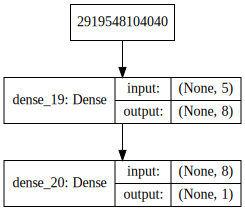

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [21]:
model.fit(x_train, output_train, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 0s 171us/step - loss: 0.2722
Epoch 2/10
1000/1000 [==============================] - 0s 177us/step - loss: 0.2175
Epoch 3/10
1000/1000 [==============================] - 0s 196us/step - loss: 0.1789
Epoch 4/10
1000/1000 [==============================] - 0s 176us/step - loss: 0.1526
Epoch 5/10
1000/1000 [==============================] - 0s 194us/step - loss: 0.1344
Epoch 6/10
1000/1000 [==============================] - 0s 189us/step - loss: 0.1218
Epoch 7/10
1000/1000 [==============================] - 0s 203us/step - loss: 0.1128
Epoch 8/10
1000/1000 [==============================] - 0s 323us/step - loss: 0.1063
Epoch 9/10
1000/1000 [==============================] - 0s 195us/step - loss: 0.1014
Epoch 10/10
1000/1000 [==============================] - 0s 153us/step - loss: 0.0976


In [22]:
model.evaluate(x=x_test, y= output_test)

200/200 [==============================] - 0s 105us/step


0.10592587409075349

#### 4.3 Simulation and evaluations

#### 4.3.1 Two-layer perceptron for time series prediction - model selection, regularisation and validation

1.

Data Generation

In [338]:
t = np.array([i for i in range(301,1501)])
input = np.array([[x(i-20), x(i-15), x(i-10), x(i-5), x(i)] for i in t])
output = np.array([x(i+5) for i in t])
x_train = input[0:1000,:]
output_train = output[0:1000]
x_test = input[1000:1200]
output_test = output[1000:1200]

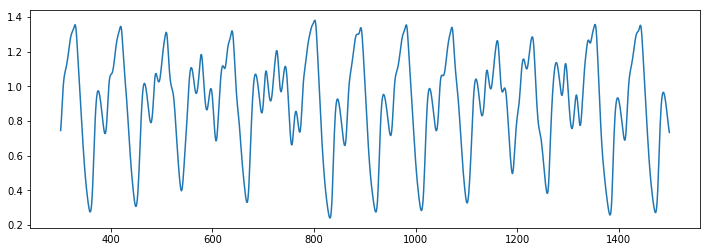

In [339]:
fig, ax = plt.subplots(figsize = [12,4])
ax.plot(t, [x(i) for i in t])
plt.show()

In [340]:
from sklearn.model_selection import KFold

val_loss_list = []
n_hidden_list = [i for i in range(1,9)]

for n_hidden in n_hidden_list:
    model = Sequential([
        Dense(n_hidden, input_shape=(5,), use_bias = True, activation = 'sigmoid'),
        Dense(1, use_bias = True),
    ])

    # For a mean squared error regression problem
    model.compile(loss='mean_squared_error', optimizer='adam')


    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, verbose=1)
    
    x_split_train, x_split_valid, output_split_train, output_split_valid = sklearn.model_selection.train_test_split(x_train,
                                                                                                                    output_train,
                                                                                                                        train_size=0.8)
    # Converting to float32 to remove keras warnings
    x_split_train = np.array(x_split_train, dtype=('float32'))
    x_split_valid = np.array(x_split_valid, dtype=('float32'))
    output_split_train = np.array(output_split_train, dtype=('float32'))
    output_split_valid = np.array(output_split_valid, dtype=('float32'))
    
    hist = model.fit(x_split_train, output_split_train, validation_data=[x_split_valid, output_split_valid],
                     callbacks=[early_stop], epochs=100 ,verbose=0)
    
    last_val_loss = hist.history['val_loss'][-1]
    val_loss_list.append(last_val_loss)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Epoch 00065: early stopping
Epoch 00078: early stopping
Epoch 00071: early stopping
Epoch 00017: early stopping
Epoch 00057: early stopping
Epoch 00036: early stopping
Epoch 00022: early stopping
Epoch 00025: early stopping


Best error mse:  0.03280616596341133


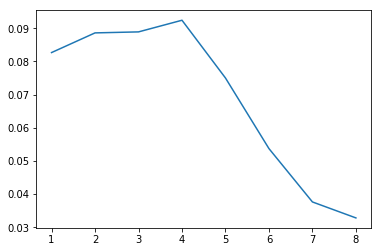

In [341]:
fig, ax = plt.subplots()
ax.plot(n_hidden_list, val_loss_list)
print('Best error mse: ', np.min(val_loss_list))

With L2 regularisation

In [305]:
from sklearn.model_selection import KFold

val_loss_list = []
n_hidden_list = [i for i in range(1,9)]

for n_hidden in n_hidden_list:
    model = Sequential([
        Dense(n_hidden, input_shape=(5,), use_bias = True, activation = 'sigmoid', kernel_regularizer=keras.regularizers.l2(0.01)),
        Dense(1, use_bias = True),
    ])

    model.compile(loss='mean_squared_error', optimizer='adam')

    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, verbose=1)
    
    x_split_train, x_split_valid, output_split_train, output_split_valid = sklearn.model_selection.train_test_split(x_train,
                                                                                                                    output_train,
                                                                                                                        train_size=0.8)
    # Converting to float32 to remove keras warnings
    x_split_train = np.array(x_split_train, dtype=('float32'))
    x_split_valid = np.array(x_split_valid, dtype=('float32'))
    output_split_train = np.array(output_split_train, dtype=('float32'))
    output_split_valid = np.array(output_split_valid, dtype=('float32'))
    
    hist = model.fit(x_split_train, output_split_train, validation_data=[x_split_valid, output_split_valid],
                     callbacks=[early_stop], epochs=100 ,verbose=0)
    
    last_val_loss = hist.history['val_loss'][-1]
    val_loss_list.append(last_val_loss)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Epoch 00060: early stopping
Epoch 00044: early stopping
Epoch 00033: early stopping
Epoch 00020: early stopping
Epoch 00038: early stopping
Epoch 00020: early stopping
Epoch 00026: early stopping
Epoch 00037: early stopping


Best error mse:  0.05565581038594246


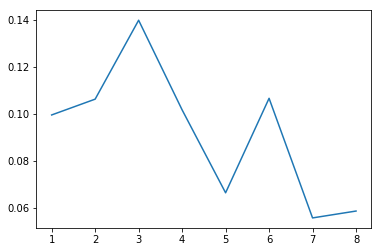

In [306]:
fig, ax = plt.subplots()
ax.plot(n_hidden_list, val_loss_list)
print('Best error mse: ', np.min(val_loss_list))

Effect of regularization strenght

In [311]:
from sklearn.model_selection import KFold

n_hidden = 7
val_loss_list = []
regularisations = [0.0001,0.001,0.01,0.1,1]
weights = []

for reg in regularisations:
    model = Sequential([
        Dense(n_hidden, input_shape=(5,), use_bias = True, activation = 'sigmoid', kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(1, use_bias = True),
    ])

    model.compile(loss='mean_squared_error', optimizer='adam')


    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, verbose=1)
    
    x_split_train, x_split_valid, output_split_train, output_split_valid = sklearn.model_selection.train_test_split(x_train,
                                                                                                                    output_train,
                                                                                                                        train_size=0.8)
    # Converting to float32 to remove keras warnings
    x_split_train = np.array(x_split_train, dtype=('float32'))
    x_split_valid = np.array(x_split_valid, dtype=('float32'))
    output_split_train = np.array(output_split_train, dtype=('float32'))
    output_split_valid = np.array(output_split_valid, dtype=('float32'))
    
    hist = model.fit(x_split_train, output_split_train, validation_data=[x_split_valid, output_split_valid],
                     callbacks=[early_stop], epochs=100 ,verbose=0)
    weights.append(model.layers[0].get_weights())
    
    last_val_loss = hist.history['val_loss'][-1]
    val_loss_list.append(last_val_loss)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Epoch 00011: early stopping
Epoch 00012: early stopping
Epoch 00034: early stopping
Epoch 00036: early stopping
Epoch 00047: early stopping


Best error mse:  0.06287801533937454


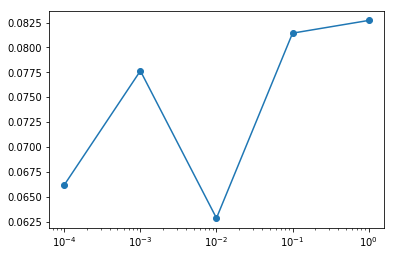

In [312]:
fig, ax = plt.subplots()
ax.plot(regularisations, val_loss_list, 'o-')
plt.xscale('log')
print('Best error mse: ', np.min(val_loss_list))

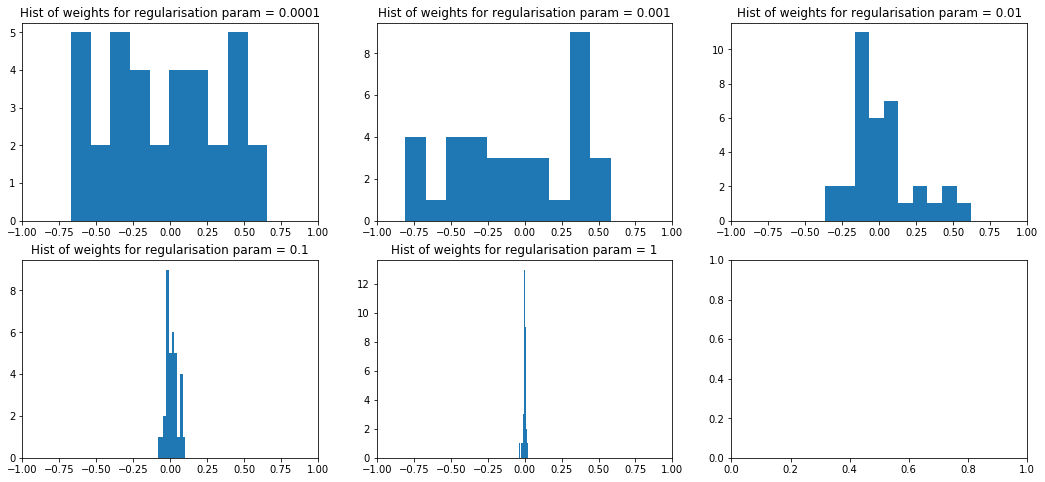

In [313]:
fig, axs = plt.subplots(2,3, figsize = [18,8])
for i in range(5):
    axs[i//3, i%3].hist(np.concatenate(weights[i][0]))
    axs[i//3, i%3].set_title('Hist of weights for regularisation param = ' + str(regularisations[i]))
    axs[i//3, i%3].set_xlim([-1,1])

([array([1., 4., 4., 4., 4., 4., 5., 2., 5., 2.]),
  array([ 6.,  4.,  8.,  8.,  7.,  7.,  9.,  5., 11.,  5.]),
  array([ 6.,  4.,  8., 10., 20., 17., 13.,  8., 13.,  6.]),
  array([ 6.,  4.,  8., 10., 21., 48., 16.,  8., 13.,  6.]),
  array([ 6.,  4.,  8., 10., 21., 83., 16.,  8., 13.,  6.])],
 array([-0.8075574 , -0.66102642, -0.51449543, -0.36796445, -0.22143346,
        -0.07490247,  0.07162851,  0.2181595 ,  0.36469048,  0.51122147,
         0.65775245]),
 <a list of 5 Lists of Patches objects>)

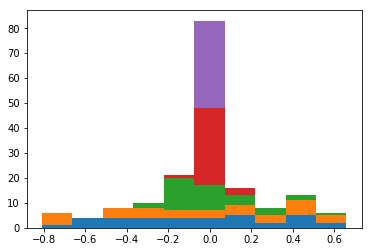

In [314]:
plt.hist([np.concatenate(i[0]) for i in weights], stacked=True)

In [315]:
from sklearn.model_selection import KFold

n_hidden = 7
val_loss_list = []
regularisations = [i for i in np.arange(0.005,0.015,0.001)]
weights = []

for reg in regularisations:
    model = Sequential([
        Dense(n_hidden, input_shape=(5,), use_bias = True, activation = 'sigmoid', kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(1, use_bias = True),
    ])

    model.compile(loss='mean_squared_error', optimizer='adam')


    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, verbose=1)
    
    x_split_train, x_split_valid, output_split_train, output_split_valid = sklearn.model_selection.train_test_split(x_train,
                                                                                                                    output_train,
                                                                                                                        train_size=0.8)
    # Converting to float32 to remove keras warnings
    x_split_train = np.array(x_split_train, dtype=('float32'))
    x_split_valid = np.array(x_split_valid, dtype=('float32'))
    output_split_train = np.array(output_split_train, dtype=('float32'))
    output_split_valid = np.array(output_split_valid, dtype=('float32'))
    
    hist = model.fit(x_split_train, output_split_train, validation_data=[x_split_valid, output_split_valid],
                     callbacks=[early_stop], epochs=100 ,verbose=0)
    weights.append(model.layers[0].get_weights())
    
    last_val_loss = hist.history['val_loss'][-1]
    val_loss_list.append(last_val_loss)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Epoch 00037: early stopping
Epoch 00033: early stopping
Epoch 00010: early stopping
Epoch 00039: early stopping
Epoch 00023: early stopping
Epoch 00036: early stopping
Epoch 00080: early stopping
Epoch 00061: early stopping
Epoch 00041: early stopping
Epoch 00048: early stopping


Best error mse:  0.052030391097068786


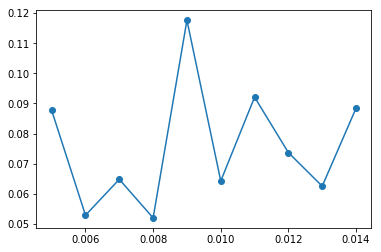

In [316]:
fig, ax = plt.subplots()
ax.plot(regularisations, val_loss_list, 'o-')
print('Best error mse: ', np.min(val_loss_list))

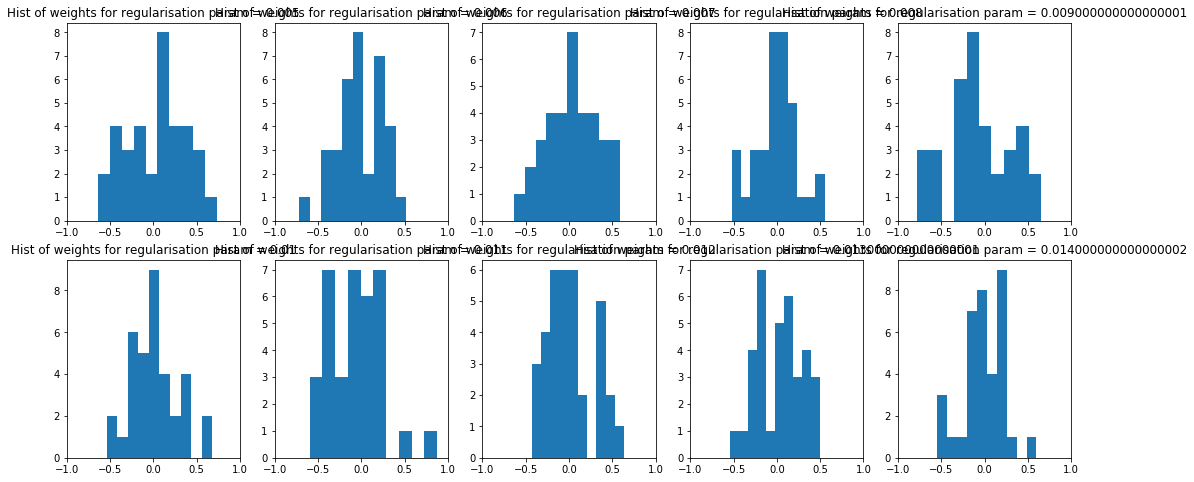

In [317]:
fig, axs = plt.subplots(2,5, figsize = [18,8])
for i in range(10):
    axs[i//5, i%5].hist(np.concatenate(weights[i][0]))
    axs[i//5, i%5].set_title('Hist of weights for regularisation param = ' + str(regularisations[i]))
    axs[i//5, i%5].set_xlim([-1,1])

Model choosen: regularization = 0.01 and 7 hidden neurons

In [329]:
model = Sequential([
    Dense(7, input_shape=(5,), use_bias = True, activation = 'sigmoid', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dense(1, use_bias = True),
])

model.compile(loss='mean_squared_error', optimizer='adam')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, verbose=1, patience = 5)
                                                                                                            
# Converting to float32 to remove keras warnings
x_split_train = np.array(x_split_train, dtype=('float32'))
x_split_valid = np.array(x_split_valid, dtype=('float32'))
output_split_train = np.array(output_split_train, dtype=('float32'))
output_split_valid = np.array(output_split_valid, dtype=('float32'))
    
model.fit(x_split_train, output_split_train, validation_data=[x_split_valid, output_split_valid],
                callbacks=[early_stop], epochs=1000 ,verbose=1)
#model.fit(x_split_train, output_split_train, validation_data=[x_split_valid, output_split_valid],
                #epochs=100 ,verbose=0)

Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 0s 452us/step - loss: 0.2157 - val_loss: 0.1684
Epoch 2/1000
800/800 [==============================] - 0s 289us/step - loss: 0.1417 - val_loss: 0.1286
Epoch 3/1000
800/800 [==============================] - 0s 197us/step - loss: 0.1196 - val_loss: 0.1194
Epoch 4/1000
800/800 [==============================] - 0s 209us/step - loss: 0.1140 - val_loss: 0.1152
Epoch 5/1000
800/800 [==============================] - 0s 275us/step - loss: 0.1099 - val_loss: 0.1114
Epoch 6/1000
800/800 [==============================] - 0s 216us/step - loss: 0.1062 - val_loss: 0.1078
Epoch 7/1000
800/800 [==============================] - 0s 194us/step - loss: 0.1027 - val_loss: 0.1043
Epoch 8/1000
800/800 [==============================] - 0s 195us/step - loss: 0.0994 - val_loss: 0.1011
Epoch 9/1000
800/800 [==============================] - 0s 322us/step - loss: 0.0962 - val_loss: 0.0980
Epoch 10/1000
800/

In [330]:
output_predicted_nn2 = np.concatenate(model.predict(x=np.array(x_test, dtype = 'float32')))

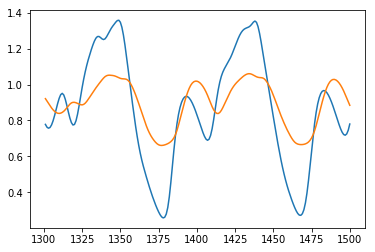

In [331]:
t_test = t[1000:1200]
plt.plot(t_test, output_test)
plt.plot(t_test, output_predicted_nn2)

Not really working...

In [322]:
from sklearn.model_selection import KFold

n_hidden_list = [i for i in range(1,9)]
val_loss_list_var = []
weights = []

for var in [0.03, 0.09, 0.18]:
    val_loss_list = []
    x_train_var = x_train + np.random.normal(loc=0, scale=var, size=x_train.shape)
    
    for n_hidden in n_hidden_list:
        model = Sequential([
            Dense(7, input_shape=(5,), use_bias = True, activation = 'sigmoid', kernel_regularizer=keras.regularizers.l2(0.01)),
            Dense(n_hidden , use_bias = True, activation = 'sigmoid', kernel_regularizer=keras.regularizers.l2(0.01)),
            Dense(1, use_bias = True),
        ])

        model.compile(loss='mean_squared_error', optimizer='adam')

        early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 3, verbose=1)

        x_split_train, x_split_valid, output_split_train, output_split_valid = sklearn.model_selection.train_test_split(x_train_var,
                                                                                                                        output_train,
                                                                                                                            train_size=0.8)
        # Converting to float32 to remove keras warnings
        x_split_train = np.array(x_split_train, dtype=('float32'))
        x_split_valid = np.array(x_split_valid, dtype=('float32'))
        output_split_train = np.array(output_split_train, dtype=('float32'))
        output_split_valid = np.array(output_split_valid, dtype=('float32'))

        hist = model.fit(x_split_train, output_split_train, validation_data=[x_split_valid, output_split_valid],
                         callbacks=[early_stop], epochs=1000 ,verbose=0)
        weights.append(model.layers[0].get_weights())

        last_val_loss = hist.history['val_loss'][-1]
        val_loss_list.append(last_val_loss)
    val_loss_list_var.append(val_loss_list)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Epoch 00037: early stopping
Epoch 00035: early stopping
Epoch 00043: early stopping
Epoch 00092: early stopping
Epoch 00034: early stopping
Epoch 00160: early stopping
Epoch 00078: early stopping
Epoch 00050: early stopping
Epoch 00043: early stopping
Epoch 00045: early stopping
Epoch 00041: early stopping
Epoch 00109: early stopping
Epoch 00063: early stopping
Epoch 00063: early stopping
Epoch 00039: early stopping
Epoch 00089: early stopping
Epoch 00047: early stopping
Epoch 00088: early stopping
Epoch 00043: early stopping
Epoch 00077: early stopping
Epoch 00062: early stopping
Epoch 00052: early stopping
Epoch 00088: early stopping
Epoch 00075: early stopping


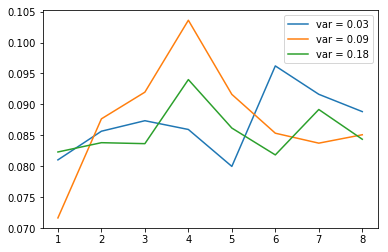

In [323]:
fig, ax = plt.subplots()
ax.plot(n_hidden_list, val_loss_list_var[0], label = 'var = 0.03')
ax.plot(n_hidden_list, val_loss_list_var[1], label = 'var = 0.09')
ax.plot(n_hidden_list, val_loss_list_var[2], label = 'var = 0.18')
ax.legend()
plt.show()

Without regularization

In [324]:
from sklearn.model_selection import KFold

n_hidden_list = [i for i in range(1,9)]
val_loss_list_var = []
weights = []

for var in [0.03, 0.09, 0.18]:
    val_loss_list = []
    x_train_var = x_train + np.random.normal(loc=0, scale=var, size=x_train.shape)
    
    for n_hidden in n_hidden_list:
        model = Sequential([
            Dense(7, input_shape=(5,), use_bias = True, activation = 'sigmoid'),
            Dense(n_hidden , use_bias = True, activation = 'sigmoid'),
            Dense(1, use_bias = True),
        ])

        model.compile(loss='mean_squared_error', optimizer='adam')

        early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001,patience = 3, verbose=1)

        x_split_train, x_split_valid, output_split_train, output_split_valid = sklearn.model_selection.train_test_split(x_train_var,
                                                                                                                        output_train,
                                                                                                                            train_size=0.8)
        # Converting to float32 to remove keras warnings
        x_split_train = np.array(x_split_train, dtype=('float32'))
        x_split_valid = np.array(x_split_valid, dtype=('float32'))
        output_split_train = np.array(output_split_train, dtype=('float32'))
        output_split_valid = np.array(output_split_valid, dtype=('float32'))

        hist = model.fit(x_split_train, output_split_train, validation_data=[x_split_valid, output_split_valid],
                         callbacks=[early_stop], epochs=1000 ,verbose=0)
        weights.append(model.layers[0].get_weights())

        last_val_loss = hist.history['val_loss'][-1]
        val_loss_list.append(last_val_loss)
    val_loss_list_var.append(val_loss_list)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Epoch 00084: early stopping
Epoch 00035: early stopping
Epoch 00052: early stopping
Epoch 00135: early stopping
Epoch 00199: early stopping
Epoch 00036: early stopping
Epoch 00095: early stopping
Epoch 00085: early stopping
Epoch 00147: early stopping
Epoch 00137: early stopping
Epoch 00096: early stopping
Epoch 00159: early stopping
Epoch 00061: early stopping
Epoch 00149: early stopping
Epoch 00080: early stopping
Epoch 00093: early stopping
Epoch 00129: early stopping
Epoch 00144: early stopping
Epoch 00167: early stopping
Epoch 00076: early stopping
Epoch 00040: early stopping
Epoch 00117: early stopping
Epoch 00133: early stopping
Epoch 00040: early stopping


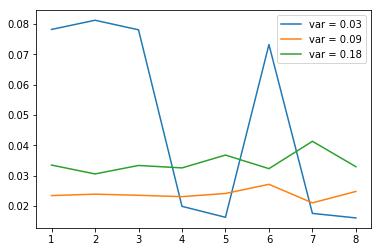

In [325]:
fig, ax = plt.subplots()
ax.plot(n_hidden_list, val_loss_list_var[0], label = 'var = 0.03')
ax.plot(n_hidden_list, val_loss_list_var[1], label = 'var = 0.09')
ax.plot(n_hidden_list, val_loss_list_var[2], label = 'var = 0.18')
ax.legend()
plt.show()

var 0.03 5 nodes
var 0.09 6 nodes
var 0.18 7 nodes

In [327]:
var = [0.03, 0.09, 0.18]
nodes = [5,6,7]
models = []

for i in range(3):
    x_train_var = x_train + np.random.normal(loc=0, scale=var[i], size=x_train.shape)

    
    model = Sequential([
        Dense(7, input_shape=(5,), use_bias = True, activation = 'sigmoid'),
        Dense(nodes[i] , use_bias = True, activation = 'sigmoid'),
        Dense(1, use_bias = True)])

    model.compile(loss='mean_squared_error', optimizer='adam')

    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001,patience = 3, verbose=1)

    x_split_train, x_split_valid, output_split_train, output_split_valid = sklearn.model_selection.train_test_split(x_train_var,
                                                                                                                        output_train,
                                                                                                                            train_size=0.8)
    # Converting to float32 to remove keras warnings
    x_split_train = np.array(x_split_train, dtype=('float32'))
    x_split_valid = np.array(x_split_valid, dtype=('float32'))
    output_split_train = np.array(output_split_train, dtype=('float32'))
    output_split_valid = np.array(output_split_valid, dtype=('float32'))

    hist = model.fit(x_split_train, output_split_train, validation_data=[x_split_valid, output_split_valid],
                         callbacks=[early_stop], epochs=1000 ,verbose=0)
    weights.append(model.layers[0].get_weights())

    models.append(model)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Epoch 00179: early stopping
Epoch 00150: early stopping
Epoch 00056: early stopping


In [197]:
models[0].layers[1].get_weights()

[array([[ 0.08732486,  0.10201471,  0.07980381, -0.01366981,  0.05610152,
          0.049831  , -0.12115696,  0.04501126],
        [ 0.11862363,  0.00699488,  0.03597909,  0.00047485,  0.10470062,
          0.11944129,  0.07426911, -0.0653896 ],
        [ 0.0104293 , -0.00049607, -0.07248624, -0.11317093,  0.11686616,
          0.07825532, -0.07131319,  0.00257276],
        [ 0.06916491, -0.03017935,  0.0823901 , -0.11978512, -0.0754832 ,
          0.07547781,  0.07564636, -0.06246107]], dtype=float32),
 array([ 0.01802014,  0.1241188 , -0.06833816, -0.01801328,  0.06752027,
         0.06388434, -0.05808296,  0.07172074], dtype=float32)]

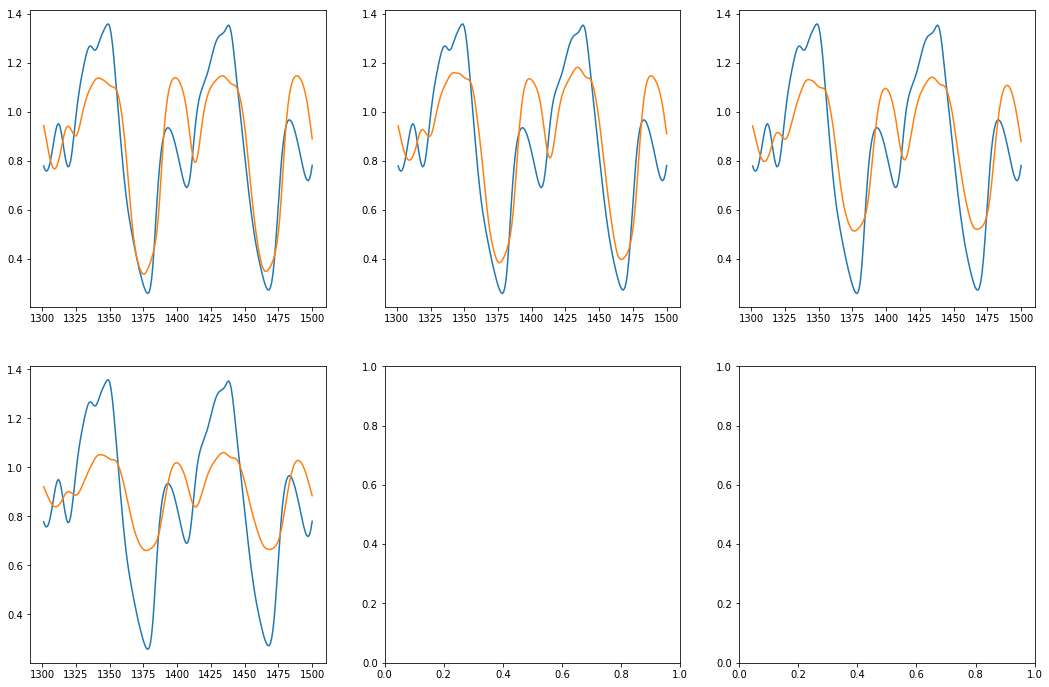

In [335]:
fig, axs = plt.subplots(2,3, figsize = [18,12])
axs[0,0].plot(t_test,output_test)
axs[0,1].plot(t_test,output_test)
axs[0,2].plot(t_test,output_test)
axs[0,0].plot(t_test, np.concatenate(models[0].predict(x=np.array(x_test, dtype = 'float32'))))
axs[0,1].plot(t_test, np.concatenate(models[1].predict(x=np.array(x_test, dtype = 'float32'))))
axs[0,2].plot(t_test, np.concatenate(models[2].predict(x=np.array(x_test, dtype = 'float32'))))

axs[1,0].plot(t_test, output_test)
axs[1,0].plot(t_test, output_predicted_nn2)
plt.show()